## prepare

In [2]:
cd /Users/schlecker/WINE/TIC237913194

/Users/schlecker/WINE/TIC237913194


In [9]:
%matplotlib inline
# %matplotlib notebook

# set default figure size
figsize = [4.3, 3.2]

some variables already defined in TIC237913194.py

In [4]:
import starry
import exoplanet
import healpy as hp

import numpy as np
import pandas as pd
import pymc3 as pm
import matplotlib as mpl
import matplotlib.pyplot as plt
from astropy import units as u
from astropy import constants as c

from popsyntools import plots, plotstyle, stats, utils, output
from popsyntools.plotstyle import set_size

import aux
import plots
from TIC237913194 import *
from utils_planets import *

%load_ext autoreload
%autoreload 2

# show more columns in pandas data frames
pd.set_option('display.max_columns', 500)

writing to out/39_tess+chat+feros+GP/posterior_table.tex.
% These params were not able to be latexifyed
% ['unnamed' 'loglike']


In [5]:
# Stellar parameters for TIC237913194
m_s = 1.026
m_s_e = 0.057
r_s = 1.088
r_s_e = 0.012
teff_star=[5788,80]
vsini_star=2.18

In [6]:
datafolder = 'data/'
plotDir = 'plots/'
# out_folder = 'out/21_tess+chat+feros+CORALIE+noGP'
# out_folder = 'out/22_tess+chat+feros+CORALIE+GP'
# out_folder = 'out/23_tess+chat+feros+noGP'
# out_folder = 'out/25_tess+chat+feros+noGP'
# out_folder = 'out/26_tess+chat+feros+noGP'
# out_folder = 'out/27_tess+chat+feros+GP'
# out_folder = 'out/31_feros_noPlanet'
# out_folder = 'out/33d_feros_uniformPprior'
out_folder = 'out/39_tess+chat+feros+GP/'


# Read results from the fits 


In [42]:
priors, params = get_priors(GP=True)
times_lc, fluxes, fluxes_error, gp_times_lc = read_photometry(datafolder,
                                                plotPhot=False, outlierIndices=outlierIndices)
times_rv, rvs, rvs_error = read_rv(datafolder)

dataset = juliet.load(
    priors=priors, t_lc=times_lc, y_lc=fluxes, yerr_lc=fluxes_error,
    t_rv=times_rv, y_rv=rvs, yerr_rv=rvs_error,
    GP_regressors_lc=gp_times_lc,
    out_folder=out_folder, verbose=True)
# results = dataset.fit(use_dynesty=True, dynamic=True) # has to be ~same call as during fit

results = pickle.load(open(out_folder + '/results.pkl', 'rb'))

	 Transit fit detected for instrument  TESSERACT+TESS
	 Transit fit detected for instrument  CHAT+i
	 >> sqrt(e)cosomega, sqrt(e)sinomega parametrization detected for lc planet p1
	 >> sqrt(e)cosomega, sqrt(e)sinomega parametrization detected for rv planet p1


produce plots

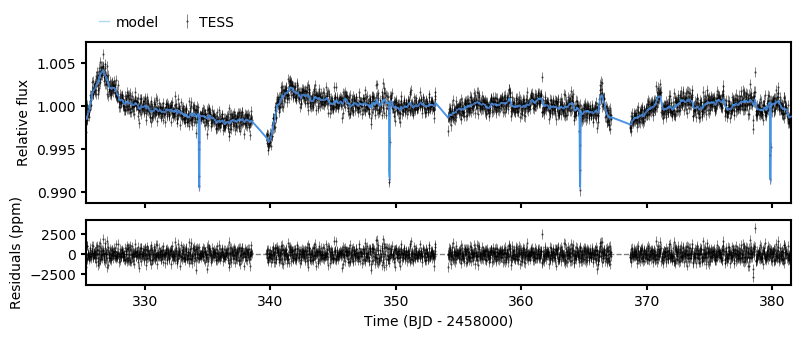

In [43]:
# fig, axs = dianaplot.plot(dataset, results)

# # # plot posteriors
# pl = 0.
# pu = 0.5
# fig = plots.plot_cornerPlot(results, pl=results.pl, pu=results.pu,
#                                 quantiles=[0.16, 0.5, 0.84], show_titles=True,
#                                 title_kwargs={"fontsize": 16}, title_fmt='.2f',
#                                 rasterized=True,
#                                 label_kwargs={"fontsize": 16 })

# fig.savefig(out_folder + '/cornerPosteriors.pdf')

# plots.plot_posteriors(results, out_folder)
#
# Plot the photometry with fit:
fig, axs = plots.plot_photometry(dataset, results)
leg = axs[0].legend(loc='lower left', ncol=99, bbox_to_anchor=(0., 1.),
                          frameon=False, columnspacing=1.6)
leg.legendHandles[0].set_alpha(.33)
plt.show()
fig.savefig(out_folder + '/photometryFitted.pdf')

# # plot RVs with fit:
# fig, axs = plots.plot_rv_fit(dataset, results)
# plt.show()
# fig.savefig(out_folder + '/RVsFitted.pdf')

## phased photometry plots

In [163]:
# from DianaScripts.plots_lc import plot_phasedLC
# plot_phasedLC(out_folder)

[None, None]

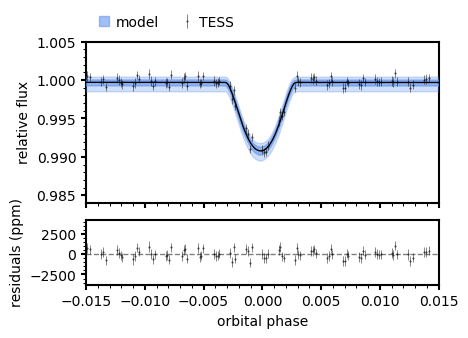

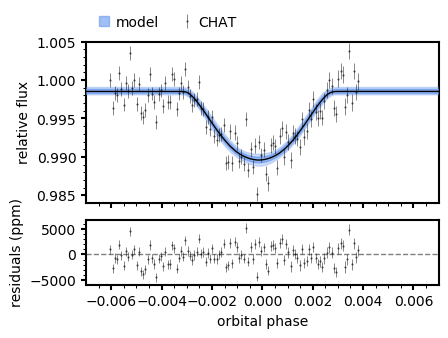

In [44]:
phasedPlots = plots.plot_phasedPhotometry(dataset, results, instrument=None)
[phasedPlots[inst][1][0].set_ylim([0.984, 1.005]) for inst in phasedPlots] # same y limits for all instruments
[phasedPlots[inst][0].savefig(out_folder + 'phasedPhot_{}.pdf'.format(aux.label(inst))) for inst in phasedPlots]

## print Latex tables

In [117]:
import latextable
import fileinput

In [125]:
# latextable.print_prior_table(dataset)
latextable.print_posterior_table(dataset, results, precision=2)

writing to out/39_tess+chat+feros+GP/posterior_table.tex.
% These params were not able to be latexifyed
% ['unnamed' 'loglike']


In [519]:
get_planetaryparams(dataset, results, mass_star=[m_s,m_s_e],
                                  radius_star=[r_s,r_s_e], teff_star=teff_star, vsini_star=vsini_star)

In [93]:
l = sorted([p for p in results.posteriors['posterior_samples'].keys()])



val, valup, valdown = juliet.utils.get_quantiles(
            results.posteriors['posterior_samples'][l[0]])

1.1046423241129084e-06

In [ ]:
## obtain the radius of the planet -- requires r_s
i_transit=1
if r_s is not None and ('p_p{}'.format(i_transit) in results.posteriors['posterior_samples'].keys() or 'p_p{}'.format(i_transit) in dataset.priors.keys()):
    try:
        p = results.posteriors['posterior_samples']['p_p{}'.format(i_transit)]
    except KeyError:
        print('gna')

    results.posteriors['posterior_samples']['radius_m_p{}'.format(i_transit)] = p * r_s*solarrad2m
#     results.posteriors['posterior_samples']['radius_re_p{}'.format(i_transit)] = results.posteriors['posterior_samples']['radius_m_p{}'.format(i_transit)]/earthrad2m
#     results.posteriors['posterior_samples']['radius_rj_p{}'.format(i_transit)] = results.posteriors['posterior_samples']['radius_m_p{}'.format(i_transit)]/jupiterrad2m

rJup = results.posteriors['posterior_samples']['radius_m_p{}'.format(i_transit)]/jupiterrad2m

<IPython.core.display.Javascript object>


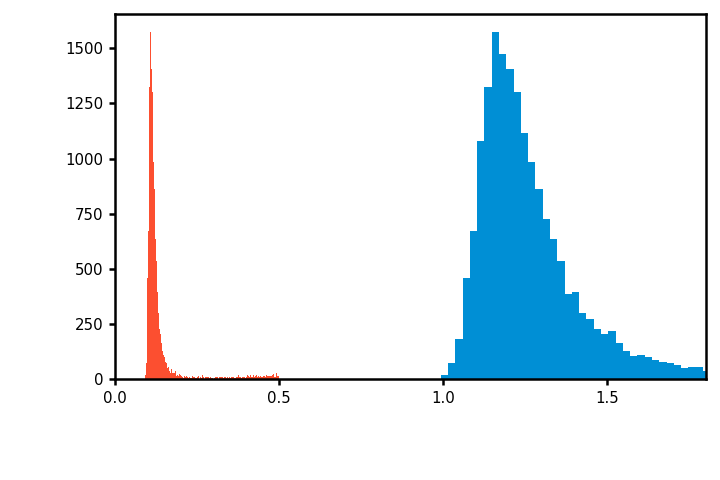

(0, 1.8)

In [564]:
h = plt.hist(rJup, bins=200)
hh = plt.hist(results.posteriors['posterior_samples']['p_p{}'.format(i_transit)], bins=200)
plt.xlim(0,1.8)

In [566]:
np.quantile(results.posteriors['posterior_samples']['p_p{}'.format(i_transit)], .84)

0.14032087882330987

## phased RV plots

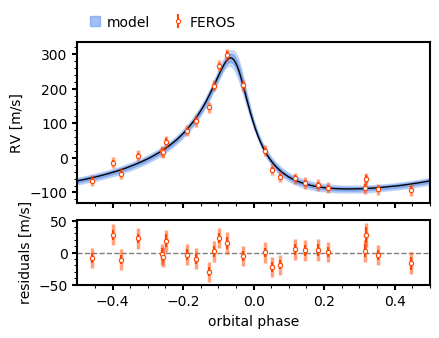

In [46]:
phasedRV = plots.plot_phasedRV(results)

In [47]:
[phasedRV[inst][0].savefig(out_folder + 'phasedRV_{}.pdf'.format(aux.label(inst))) for inst in phasedRV]

[None]

# activity indicators


In [49]:
activityFile = 'data/TIC237913194_activity.dat'

<IPython.core.display.Javascript object>


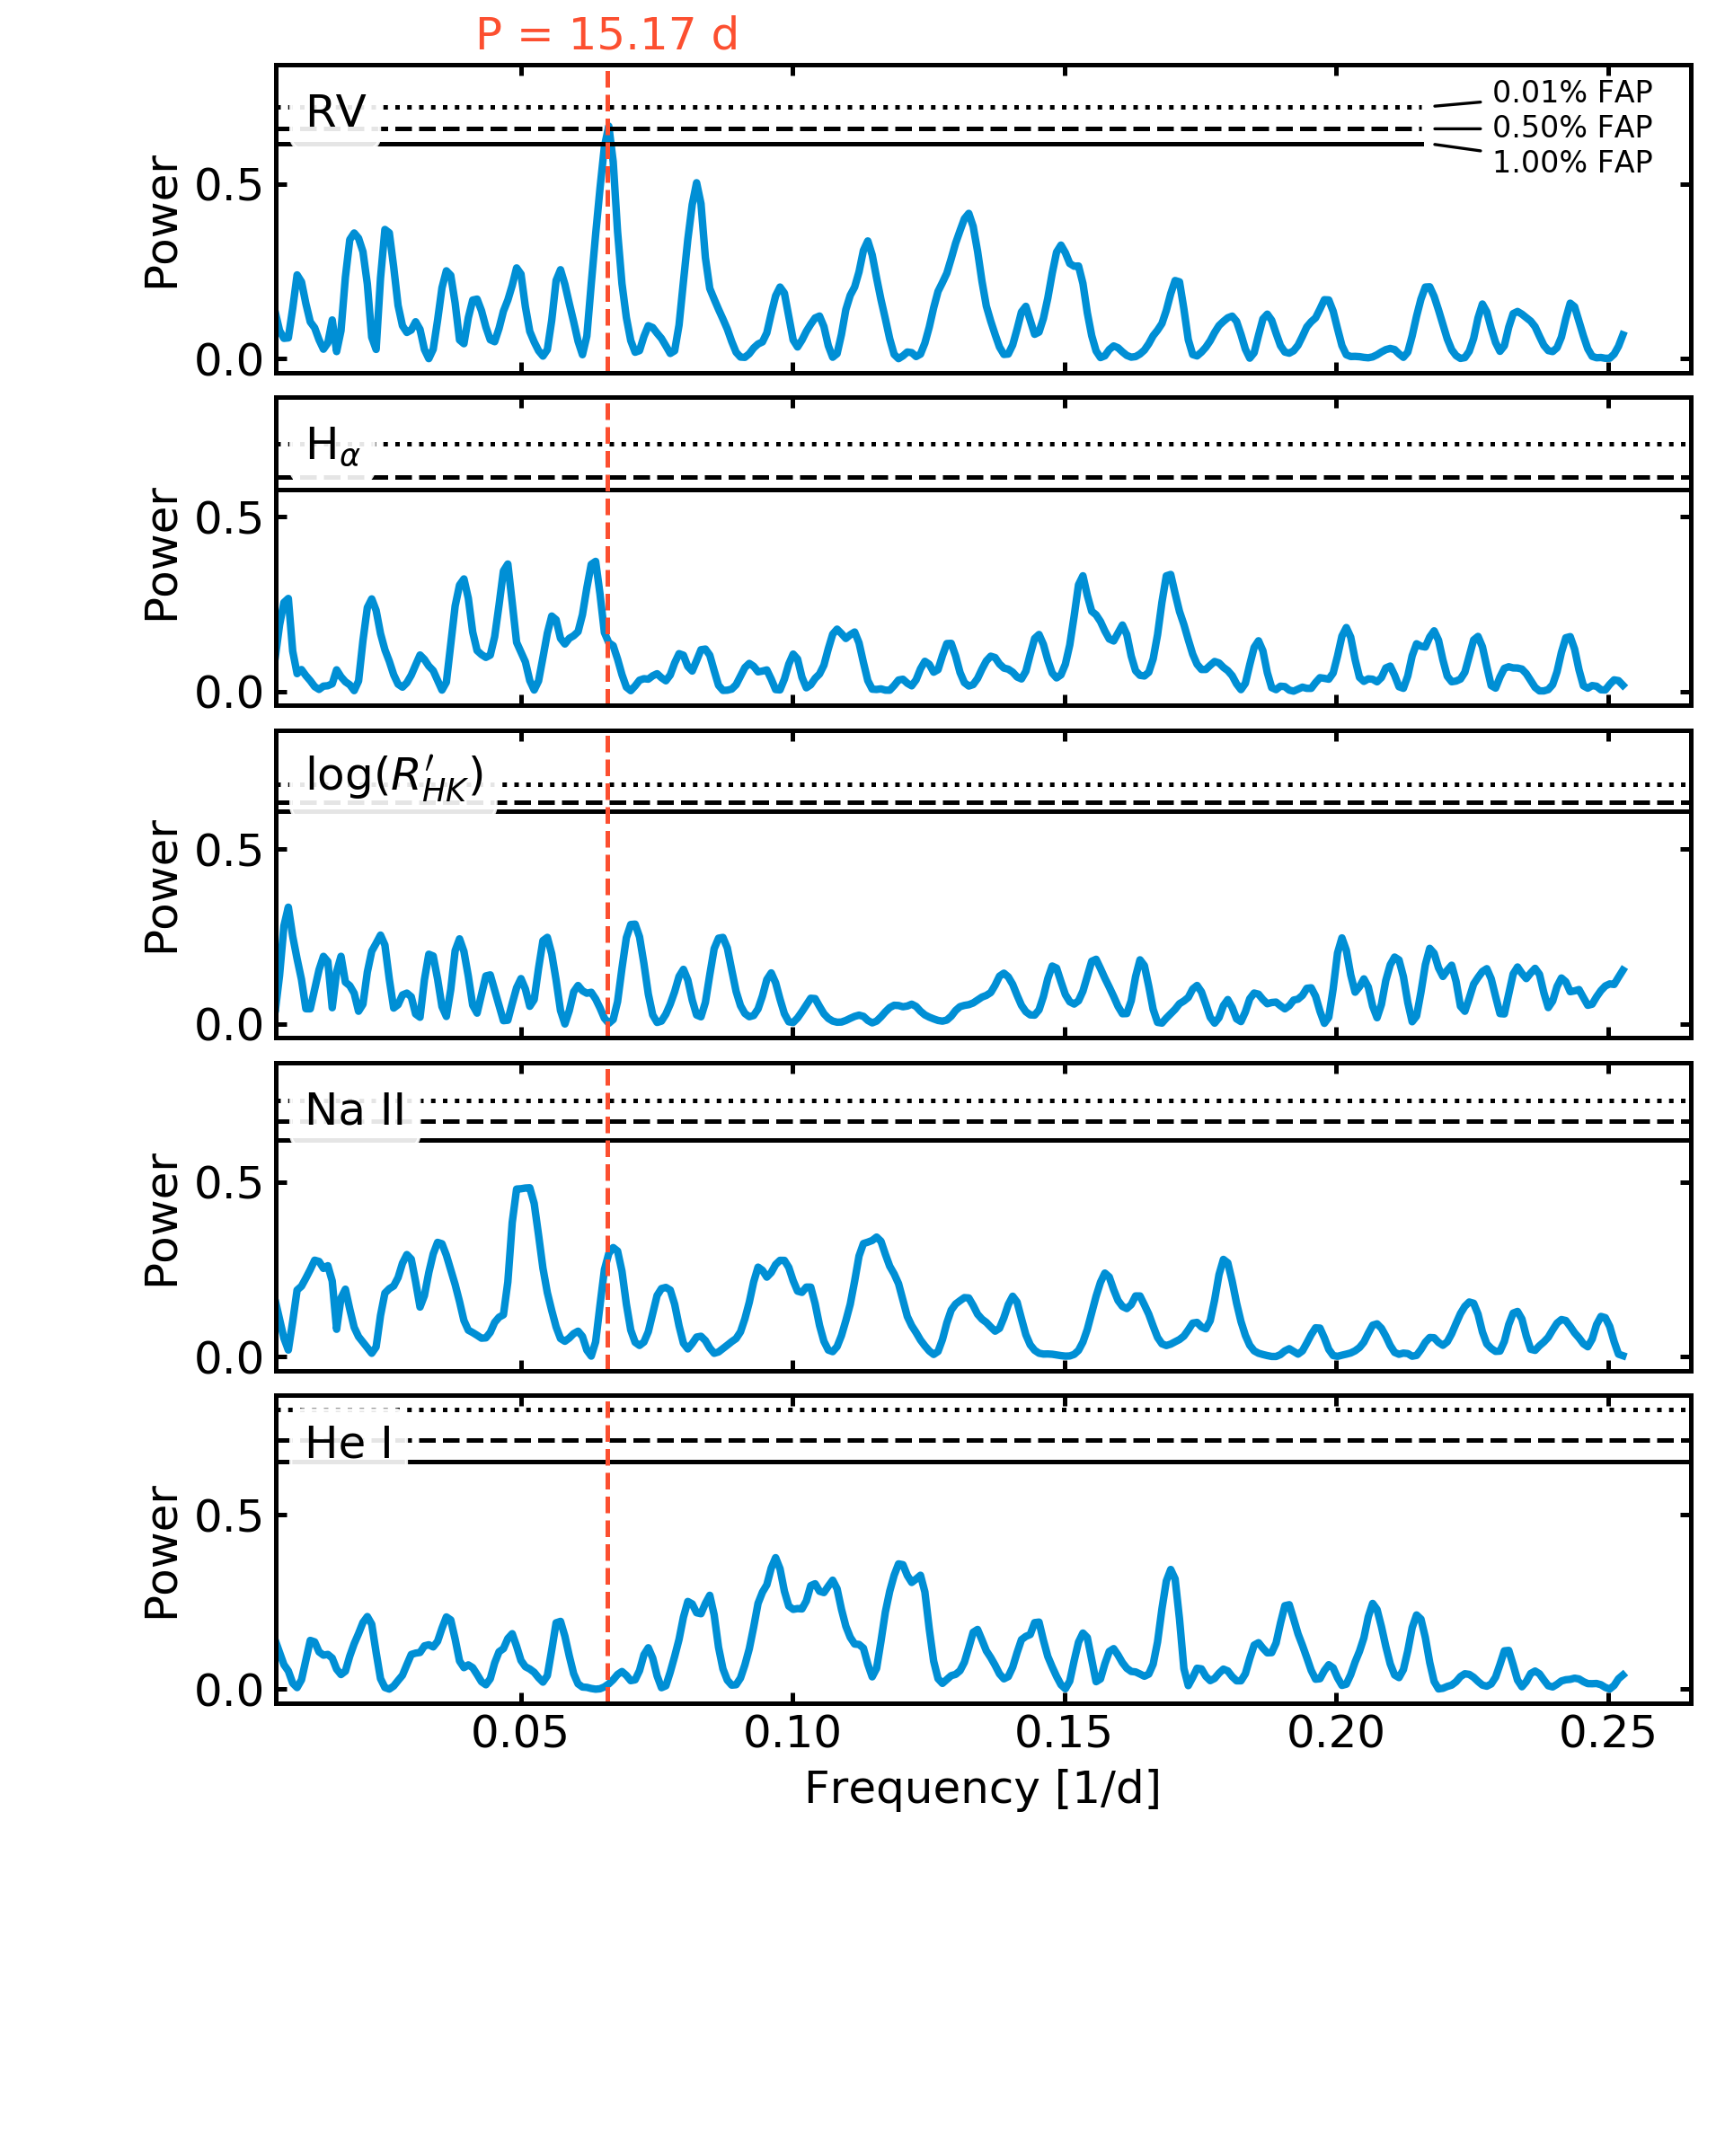

(<Figure size 800x1000 with 5 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a4fdd7090>,
       dtype=object))

In [570]:
plots.plot_periodograms(activityFile, out_folder, results, saveFig=True)

Text(0, 0.5, 'LOG RHK')

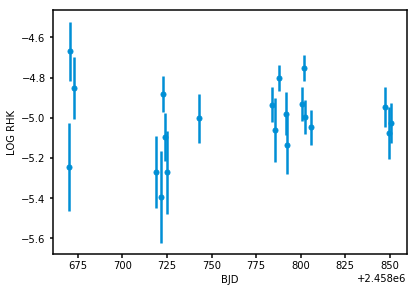

In [112]:
# log RHK timeseries
plt.errorbar(feros_dat['BJD_OUT'], feros_dat['LOG_RHK'], yerr=feros_dat['LOGRHK_E'], fmt='o')
plt.xlabel('BJD')
plt.ylabel('LOG RHK')

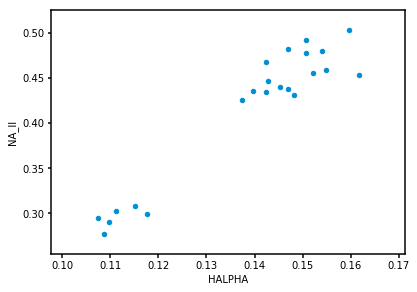

In [114]:
feros_dat.plot.scatter('HALPHA', 'NA_II')

## Check Bisector Span

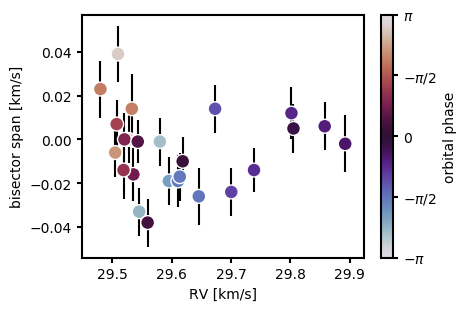

In [54]:
fig, ax = plots.plot_RV_BS(activityFile, out_folder, results)

In [55]:
# fig.savefig(out_folder + '/RV-BS.pdf')

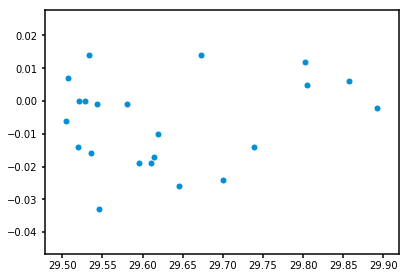

In [120]:
plt.scatter(feros_dat.phase, feros_dat.BS)

In [124]:
from scipy.stats import spearmanr, pearsonr

spearmanr(feros_dat.phase, feros_dat.BS)
# pearsonr(feros_dat.phase, feros_dat.BS)

SpearmanrResult(correlation=0.38394157672504353, pvalue=0.07772241962412424)

# Phase curves
use spiderman package to produce a phase curve

In [227]:
results.posteriors['posterior_samples'].keys()

dict_keys(['unnamed', 'loglike', 'P_p1', 't0_p1', 'sesinomega_p1', 'secosomega_p1', 'K_p1', 'mu_FEROS', 'sigma_w_FEROS'])

In [619]:
import spiderman as sp

use values from preliminary fit. Neglect planetary limb darkening.

In [1240]:
spider_params = sp.ModelParams(brightness_model="zhang")
spider_params.n_layers= 7

def median_pstr(results, param):
    """extract median of posterior distribution"""
    return np.median(results.posteriors['posterior_samples'][param])
pstr = {}
for key in ['t0_p1', 'P_p1']:
    pstr[key] = median_pstr(results, key)

spider_params.t0= pstr['t0_p1']              # Central time of PRIMARY transit [days]
spider_params.per= pstr['P_p1']       # Period [days]
spider_params.a_abs= 0.1122        # The absolute value of the semi-major axis [AU]
# spider_params.a_abs= 0.05        # The absolute value of the semi-major axis [AU]

spider_params.inc= 87.6         # Inclination [degrees]
# spider_params.inc= 0.         # Inclination [degrees]

# spider_params.ecc= 0.6              # Eccentricity
spider_params.ecc= 0.              # Eccentricity

spider_params.w= 0.                 # Argument of periastron
# spider_params.w= 90.                 # Argument of periastron



spider_params.a= 22.2              # Semi-major axis scaled by stellar radius
# spider_params.a= 11.              # Semi-major axis scaled by stellar radius

spider_params.p_u1= 0               # Planetary limb darkening parameter
spider_params.p_u2= 0               # Planetary limb darkening parameter

temperatures from Teq estimate

In [1241]:
# spider_params.xi= 1.       # Ratio of radiative to advective timescale
spider_params.xi= 0.       # Ratio of radiative to advective timescale

spider_params.T_n= 683     # Temperature of nightside

spider_params.delta_T= 727  # Day-night temperature contrast
# spider_params.delta_T= 0# Day-night temperature contrast

spider_params.T_s = 5788    # Temperature of the star

# spider_params.l1 = 1.1e-6       # The starting wavelength in meters
# spider_params.l2 = 1.7e-6       # The ending wavelength in meters
spider_params.l1 = 0.6e-6       # The starting wavelength in meters
spider_params.l2 = 12e-6       # The ending wavelength in meters

careful, spidermabn uses zorder arguments. therefore the star is plotted over the planet even during transit phase (when plotting into the same axis repeatedly).

Brightness parameters incorrectly assigned
should be ['pb_d', 'pb_n']


NameError: name 'quit' is not defined

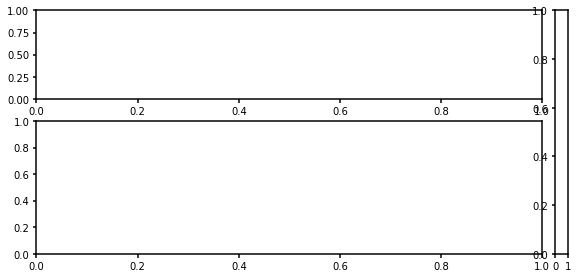

In [1255]:
# spider_params.plot_quad()

# spider_params.rp= 0.118            # Planet to star radius ratio

def plot_phasecurve(spider_params, phases=None):
    spider_params.rp= .67            # Planet to star radius ratio 


    fig = plt.figure(figsize=[9,4])
    grid = plt.GridSpec(2, 2, hspace=0.2, wspace=0.05, height_ratios=[1,1.5], width_ratios=[1, 0.025])
    axs = [None, None]
    axs[0] = fig.add_subplot(grid[0,0])
    axs[1] = fig.add_subplot(grid[1,0])
    cax = fig.add_subplot(grid[:,1])

    # fig, (cax, ax0, ax1)= plt.subplots(3, figsize=[15,5], gridspec_kw = {'height_ratios':[0.1,2,1]})
    # axs = [ax0, ax1]

    # deltaPhase = 1/8575 # delta to control plotted phases
    if phases == None:
        phases = np.linspace(0.,1., 24) - 0.012#deltaPhase

    # plot system
    show_cax = False
    # unify color-code limits
    lims = np.array([spider_params.get_lims(p, temp_map=False, use_phase=True) for p in phases])
    min_brightness =  min(lims[:,0])/2
    max_brightness =  max(lims[:,1])

    for i, p in enumerate(phases[::-1]):
        # iterate backwards trough phases because of overplotting
        if i > 0:
            show_cax = False
        axs[0] = spider_params.plot_system(t=p, ax=axs[0], use_phase=True, show_axes=False, 
                                       theme='white', show_cax=show_cax, temp_map=False,
                                          min_temp=min_brightness, max_temp=max_brightness)

    # plot colorbar
    cbardata = [np.linspace(min_brightness/max_brightness,1,1000)]
    figx, axx = plt.subplots()
    im = axx.imshow(cbardata, interpolation='none')
    # cbar = fig.colorbar(im, cax=cax, shrink=1., orientation='horizontal')
    cbar = fig.colorbar(im, cax=cax, shrink=1)
    cbar.set_label('relative brightness')
    plt.close(figx)

    axs[0].autoscale(tight=False)

    # plot phase curve for nominal xi, but using actual planet size
    spider_params.rp= 0.118
    phases_lc = np.linspace(+.02, .98, 1000)
    lc = spider_params.lightcurve(phases_lc, use_phase=True)
    axs[1].plot(phases_lc,lc -1, label=r'$\xi$ = 0')

    # plot phase curve for many different xi
    for spider_params.xi in np.linspace(0., 1, 20):
        lc = spider_params.lightcurve(phases_lc, use_phase=True)
        axs[1].plot(phases_lc,lc - 1, alpha=.1, c='k', lw=1.)
    axs[1].plot(phases_lc,lc - 1, alpha=.1, c='k', lw=1., label=r'$\xi = \mathcal{U}\,(0,1)$')

    [axs[1].axvline(p, ls='--', c='C2', lw=1.2, alpha=.66, zorder=-1) for p in phases]
    axs[1].set_xlabel('orbital phase')
    axs[1].set_ylabel('relative flux')
    axs[1].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
    leg = axs[1].legend(loc='lower right', ncol=99, bbox_to_anchor=(1., 1.),
                          frameon=False, columnspacing=1.6)
    leg.legendHandles[1].set_alpha(.33)

    # subplots_adjust(left=None, bottom=None, right=None, top=1., wspace=None, hspace=None)
    return fig, axs


fig, axs = plot_phasecurve(spider_params)
axs[0].set_rasterized(True)
# fig.savefig(plotDir + 'phasecurve3.pdf', rasterized=True)

In [1174]:
# fig.savefig(plotDir + 'phasecurve3.pdf', rasterized=True)

maybe useful for a video:

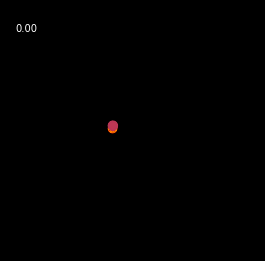

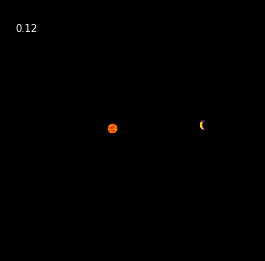

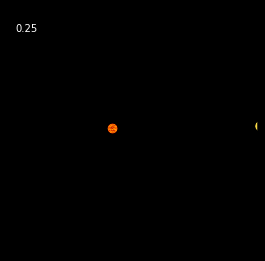

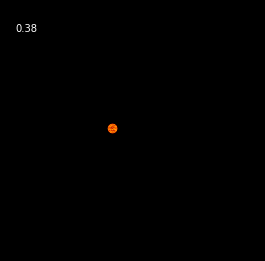

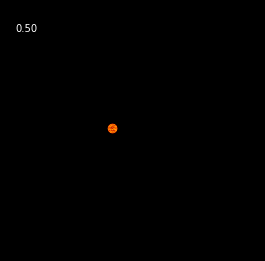

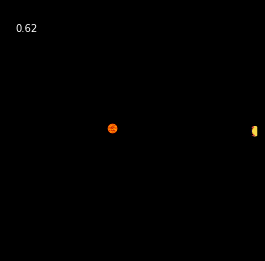

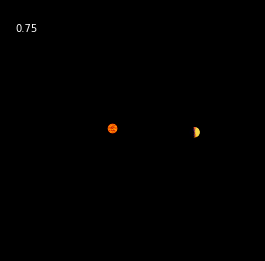

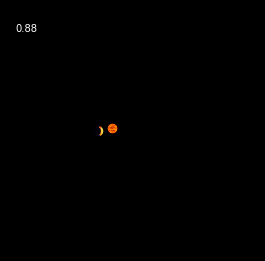

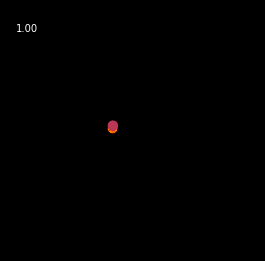

In [1275]:
params.rp= .95
for i, p in enumerate(phases[:]):
    ax = params.plot_system(t=p, use_phase=True, show_axes=False, 
                                   theme='black', show_cax=False, temp_map=False)
    ax.annotate('{:.2f}'.format(p), [0.02, 0.9], xycoords='axes fraction', color='white')
#     ax.autoscale(tight=False)
    ax.set_xlim(axs[0].get_xlim())
    ax.set_ylim(axs[0].get_ylim())

use different brightness model

In [1297]:
# params = params
# dummy = sp.ModelParams(brightness_model="two brightness")
# params.brightness_type = dummy.brightness_type

params = sp.ModelParams(brightness_model="hotspot_b")
params.n_layers= 7

def median_pstr(results, param):
    """extract median of posterior distribution"""
    return np.median(results.posteriors['posterior_samples'][param])
pstr = {}
for key in ['t0_p1', 'P_p1']:
    pstr[key] = median_pstr(results, key)

params.t0= pstr['t0_p1']              # Central time of PRIMARY transit [days]
params.per= pstr['P_p1']       # Period [days]
params.a_abs= 0.1122        # The absolute value of the semi-major axis [AU]
# params.a_abs= 0.05        # The absolute value of the semi-major axis [AU]

params.inc= 87.6         # Inclination [degrees]
# params.inc= 0.         # Inclination [degrees]

params.ecc= 0.6              # Eccentricity
# params.ecc= 0.              # Eccentricity

params.w= 0.                 # Argument of periastron
# params.w= 90.                 # Argument of periastron

params.a= 22.2              # Semi-major axis scaled by stellar radius
# params.a= 11.              # Semi-major axis scaled by stellar radius

params.p_u1= 0               # Planetary limb darkening parameter
params.p_u2= 0               # Planetary limb darkening parameter

# params.xi= 1.       # Ratio of radiative to advective timescale
params.xi= 0.       # Ratio of radiative to advective timescale

params.T_n= 683     # Temperature of nightside

params.delta_T= 727  # Day-night temperature contrast
# params.delta_T= 0# Day-night temperature contrast

params.T_s = 5788    # Temperature of the star

# params.l1 = 1.1e-6       # The starting wavelength in meters
# params.l2 = 1.7e-6       # The ending wavelength in meters
params.l1 = 0.6e-6       # The starting wavelength in meters
params.l2 = 12e-6       # The ending wavelength in meters


# params.p_T = 500
# params.pb_d = .5
# params.pb_n = .05


# for 'hotspot_b' model:
params.spot_b = 1000
params.p_b = 0.05 #frac of stellar brightness
params.la0 = 0
params.lo0 = 0
params.size = 90


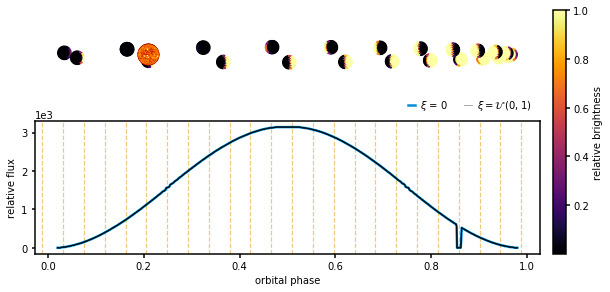

In [1298]:
phases = list(np.linspace(0., 1., 9, endpoint=True))
fig, axs = plot_phasecurve(params, phases=None)


# params.rp= .67
# params.plot_system(t=.83,  use_phase=True, show_axes=False, 
#                                        theme='white', show_cax=show_cax, temp_map=False)

## try starry package

In [12]:
starry.config.lazy = False

### Model a star-planet system

In [71]:
# estimate planet/star luminosity ratio
r_st = 1.09
r_pl = 0.118
Teff_st = 5788
# Teff_pl = 870
Teff_pl = 1600 # take the maximum from the instantatneous redist. Teq estimate
Lratio = 0.5*(r_pl/r_st)**2*(Teff_pl/Teff_st)**4 #factor 1/2 because only half of the planet radiates
print('luminosity ratio = {:.0e}'.format(Lratio))

# define primary (star)
st = {
    'inc' : 90,
    'obl' : 0.,
    'm' : 1.026,
    'r' : r_st,
    'prot' : 1.,
    'veq' : 2.18e3,
    'u1' : .65,
    'u2' : 0.
} 

# define secondary (planet)
pl = {
    'm': 0.002,
    'r': r_pl,
    'L' : Lratio,
    'ecc': 0.57,
    'omega': 0.,
    'inc': 87.6,
#     'inc': 90.0,
    'prot': 3.7,
    'porb': 15.17,
    't0':  2458319.15058,
    'theta0' : 0          # hotspot offset
}

luminosity ratio = 3e-05


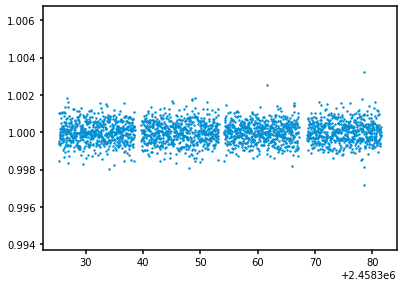

In [58]:
t = times_lc['TESSERACT+TESS']
flux = fluxes['TESSERACT+TESS']
flux_err = fluxes_error['TESSERACT+TESS']

model_prediction = results.lc.evaluate('TESSERACT+TESS', t = t, GPregressors = t)
t_detr, flux_detr, flux_err_detr = t, flux/model_prediction, flux_err/model_prediction
plt.scatter(t_detr, flux_detr, s=2)

In [59]:
rv=False


def get_luminosity(r, T):
    return 4*np.pi*r**2*c.sigma_sb*T**4
lum_st = get_luminosity(st['r'], Teff_st) 
lum_pl = 0.5*get_luminosity(pl['r'], Teff_pl) # assume only half of planetary surface radiates

# Instantiate the star; all its parameters are assumed
# to be known exactly
A = starry.Primary(
    starry.Map(ydeg=0, udeg=2, amp=1., inc=st['inc'], veq=st['veq'], obl=st['obl'], rv=rv),
    m=st['m'], r=st['r'], prot=st['prot'])
A.map[1] = st['u1'] 
A.map[2] = st['u2'] 

# Instantiate the planet. fix also the luminosity and the hot spot offset.
b = starry.Secondary(
    starry.Map(ydeg=1, udeg=0, amp=Lratio, inc=90.0, obl=0.0, rv=rv, veq=0),
    m=pl['m'],
    r=pl['r'],
    ecc=pl['ecc'],
    omega=pl['omega'],
    inc=pl['inc'],
#     prot=pl['prot'],
    prot=pl['prot'],
    porb=pl['porb'],
    t0 = pl['t0'],
    theta0 = pl['theta0']) 

# give the planet a simple dipole map (Y_1,0) with peak brightness at the substellar point
b.map[1, 0] = 0.5 
# b.theta0 = 180.0 + 0.

# A.map.show()
# b.map.show()

Invalid keyword `inc` in call to `reset()`. Ignoring.
Invalid keyword `veq` in call to `reset()`. Ignoring.
Invalid keyword `obl` in call to `reset()`. Ignoring.
Pre-computing some matrices... Done.
Invalid keyword `veq` in call to `reset()`. Ignoring.


In [60]:
t = np.linspace(pl['t0'], pl['t0'], 1000)

# combine planet and star to a system
system = starry.System(A, b)

In [61]:
# system.show(t[::10], window_pad=5.0,)

generate a synthetic light curve

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


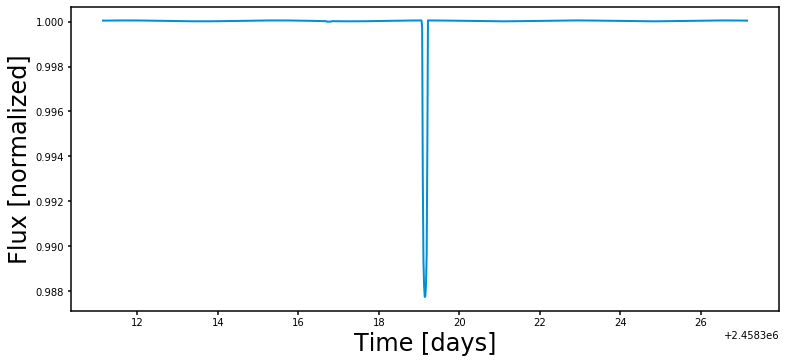

In [63]:
t = np.linspace(pl['t0'] - 8, pl['t0'] + 8, 1000)
flux_true = system.flux(t)
ferr = 842*1e-6
# flux = flux_true + ferr * np.random.randn(len(t))
plt.figure(figsize=(12, 5))
# plt.plot(t, flux, "k.", alpha=0.3, ms=3)
plt.plot(t, flux_true)
plt.xlabel("Time [days]", fontsize=24)
plt.ylabel("Flux [normalized]", fontsize=24);

plot only the planet flux

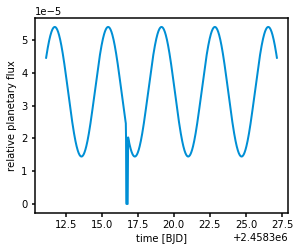

In [79]:
flux_star, flux_planet = system.flux(t, total=False)
fig, ax = plt.subplots(figsize=figsize)
ax.plot(t, flux_planet)
ax.set_xlabel("time [BJD]")
ax.set_ylabel("relative planetary flux");
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
fig.show()

In [65]:
fig.savefig(out_folder + 'phasecurve_planetonly.pdf')

[None, None, None]

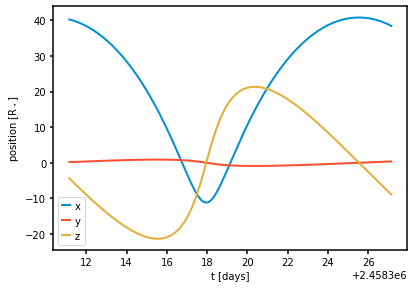

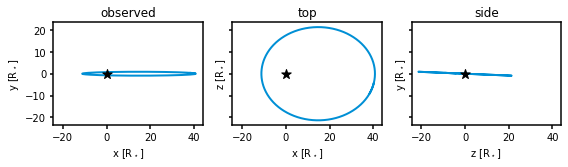

In [55]:
# plot the system
x, y, z = system.position(t)

plt.plot(t, x[1], label="x")
plt.plot(t, y[1], label="y")
plt.plot(t, z[1], label="z")
plt.ylabel("position [R$_\star$]")
plt.xlabel("t [days]")
plt.legend()

fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=[2*f for f in figsize])
ax[0].plot(x[1], y[1])
ax[1].plot(x[1], z[1])
ax[2].plot(z[1], y[1])
for n in [0, 1, 2]:
    ax[n].scatter(0, 0, marker="*", color="k", s=100, zorder=10)
ax[0].set_xlabel(r"x [R$_\star$]")
ax[0].set_ylabel(r"y [R$_\star$]")
ax[1].set_xlabel(r"x [R$_\star$]")
ax[1].set_ylabel(r"z [R$_\star$]")
ax[2].set_xlabel(r"z [R$_\star$]")
ax[2].set_ylabel(r"y [R$_\star$]");
ax[0].set_title('observed')
ax[1].set_title('top')
ax[2].set_title('side')

[a.set_aspect("equal") for a in ax]

In [56]:
fig.savefig(out_folder + 'systemOrientation.pdf')

In [44]:
b.r = .5
mpl.rc('lines', linewidth = 2)
system.show(t=np.linspace(0, pl['porb'], 20), window_pad=40, figsize=(30, 20), cmap='hot', file=out_folder + 'starry_animated.avi', html5_video=False)

### Fitting phase curve to TESS photometry (just a test, not sensible) 
either raw (t, flux, flux_err) or detrended (+_detr)

In [ ]:
t = times_lc['TESSERACT+TESS']
flux = fluxes['TESSERACT+TESS']
flux_err = fluxes_error['TESSERACT+TESS']

model_prediction = results.lc.evaluate('TESSERACT+TESS', t = t, GPregressors = t)
t_detr, flux_detr, flux_err_detr = t, flux/model_prediction, flux_err/model_prediction

In [613]:
with pm.Model() as model:

    # These are the variables we're solving for;
    # here we're placing wide Gaussian priors on them.
    offset = pm.Normal("offset", 0.0, 50.0, testval=0.11)
    log_amp = pm.Normal("log_amp", -4.0, 2.0, testval=-3.91)
#     log_amp = -2.

    # Instantiate the star; all its parameters are assumed
    # to be known exactly
    A = starry.Primary(
        starry.Map(ydeg=0, udeg=2, amp=1.0, inc=st['inc'], obl=st['obl']), m=st['m'], r=st['r'], prot=st['prot'])
    A.map[1] = st['u1'] 
    A.map[2] = st['u2'] 

    # Instantiate the planet. Everything is fixed except for
    # its luminosity and the hot spot offset.
    b = starry.Secondary(
        starry.Map(ydeg=1, udeg=0, amp=10 ** log_amp, inc=90.0, obl=0.0),
        m=pl['m'],
        r=pl['r'],
        ecc=pl['ecc'],
        omega=pl['omega'],
        inc=pl['inc'],
        prot=pl['prot'],
        porb=pl['porb'],
        t0 = pl['t0']
    ) 
    
    b.map[1, 0] = 0.5
    b.theta0 = 180.0 + offset

    # Instantiate the system as before
    sys = starry.System(A, b)

    # Our model for the flux
    flux_model = pm.Deterministic("flux_model", sys.flux(t))

    # This is how we tell `pymc3` about our observations;
    # we are assuming they are ampally distributed about
    # the true model. This line effectively defines our
    # likelihood function.
    pm.Normal("obs", flux_model, sd=flux_err, observed=flux)

Invalid keyword `inc` in call to `reset()`. Ignoring.
Invalid keyword `obl` in call to `reset()`. Ignoring.
Pre-computing some matrices... Done.


Great! The first thing we usually do is run this model through an optimizer (which is usually fast, since starry computes derivatives):


In [614]:
%%time
with model:
    map_soln = exoplanet.optimize()

optimizing logp for variables: [log_amp, offset]
36it [00:00, 52.80it/s, logp=9.084502e+03] 

CPU times: user 3.23 s, sys: 79.7 ms, total: 3.31 s
Wall time: 1.98 s



message: Optimization terminated successfully.
logp: 8902.266839849814 -> 9084.501902137446


best fit model:

offset: 130.05158040399968
log_amp: -3.7691960787350958


<IPython.core.display.Javascript object>


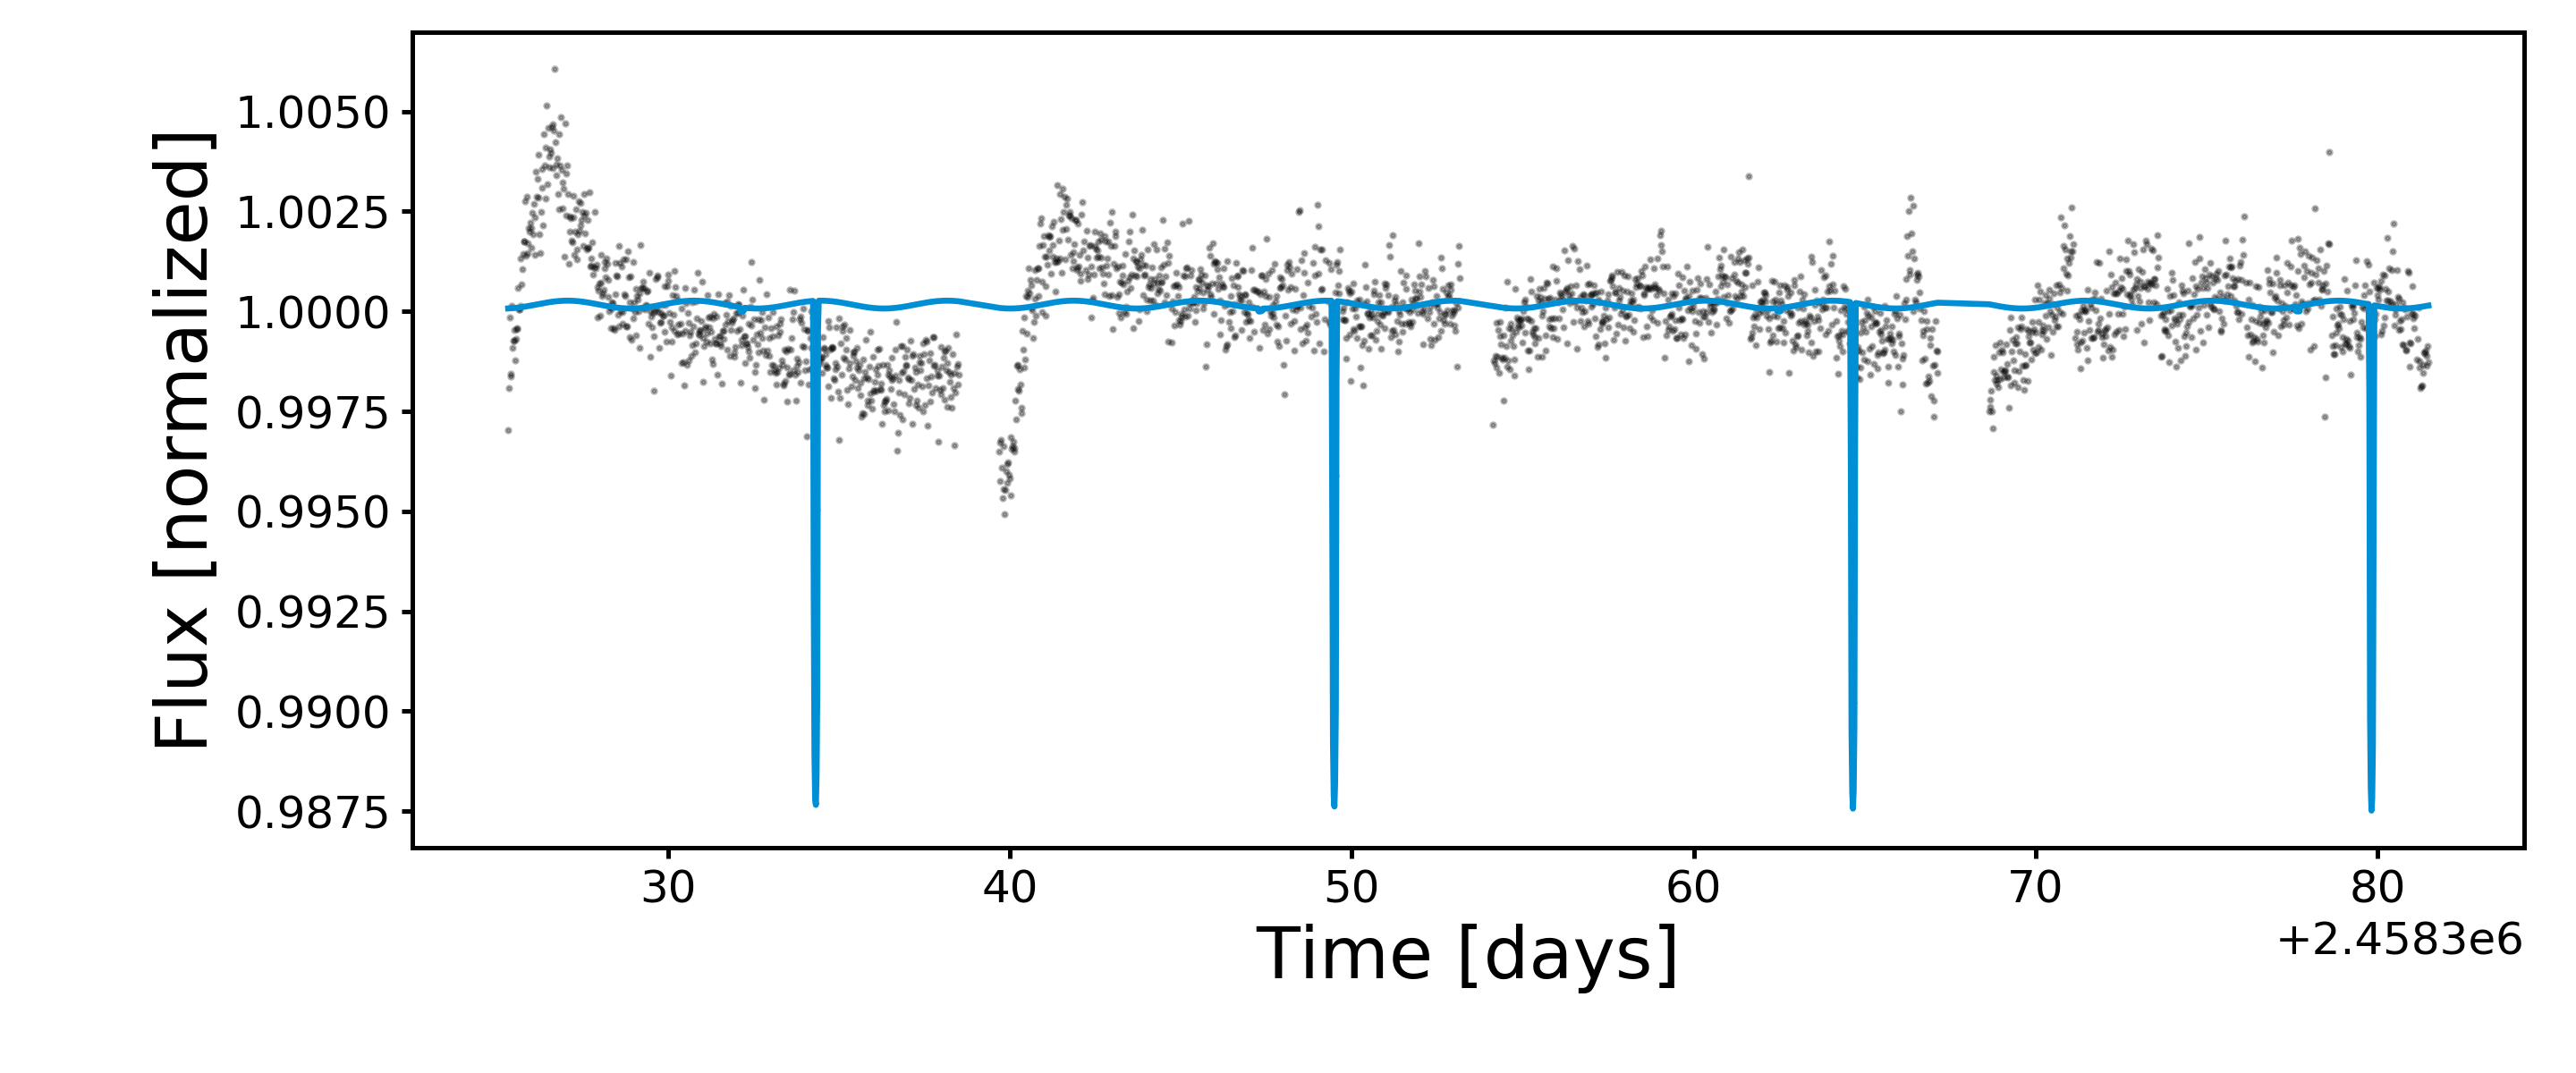

In [618]:
print("offset:", map_soln["offset"])
print("log_amp:", map_soln["log_amp"])

plt.figure(figsize=(12, 5))
plt.plot(t, flux, "k.", alpha=0.3, ms=3)
plt.plot(t, map_soln["flux_model"])
plt.xlabel("Time [days]", fontsize=24)
plt.ylabel("Flux [normalized]", fontsize=24);
plt.show()

#### get posteriors

In [616]:
%%time
with model:
    trace = pm.sample(
        tune=250,
        draws=500,
        start=map_soln,
        chains=4,
        cores=1,
        step=exoplanet.get_dense_nuts_step(target_accept=0.9),
    )

# sampling summary
pm.summary(trace, var_names=["log_amp", "offset"])

Sequential sampling (4 chains in 1 job)
NUTS: [log_amp, offset]
Sampling chain 3, 0 divergences: 100%|██████████| 750/750 [00:05<00:00, 134.07it/s]


CPU times: user 1min 36s, sys: 1.73 s, total: 1min 38s
Wall time: 33.4 s


,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
log_amp,-3.774,0.029,-3.830,-3.722,0.001,0.001,1635.0,1632.0,1657.0,1146.0,1.0
offset,130.025,5.069,119.587,138.500,0.139,0.098,1329.0,1329.0,1329.0,1110.0,1.0


<IPython.core.display.Javascript object>


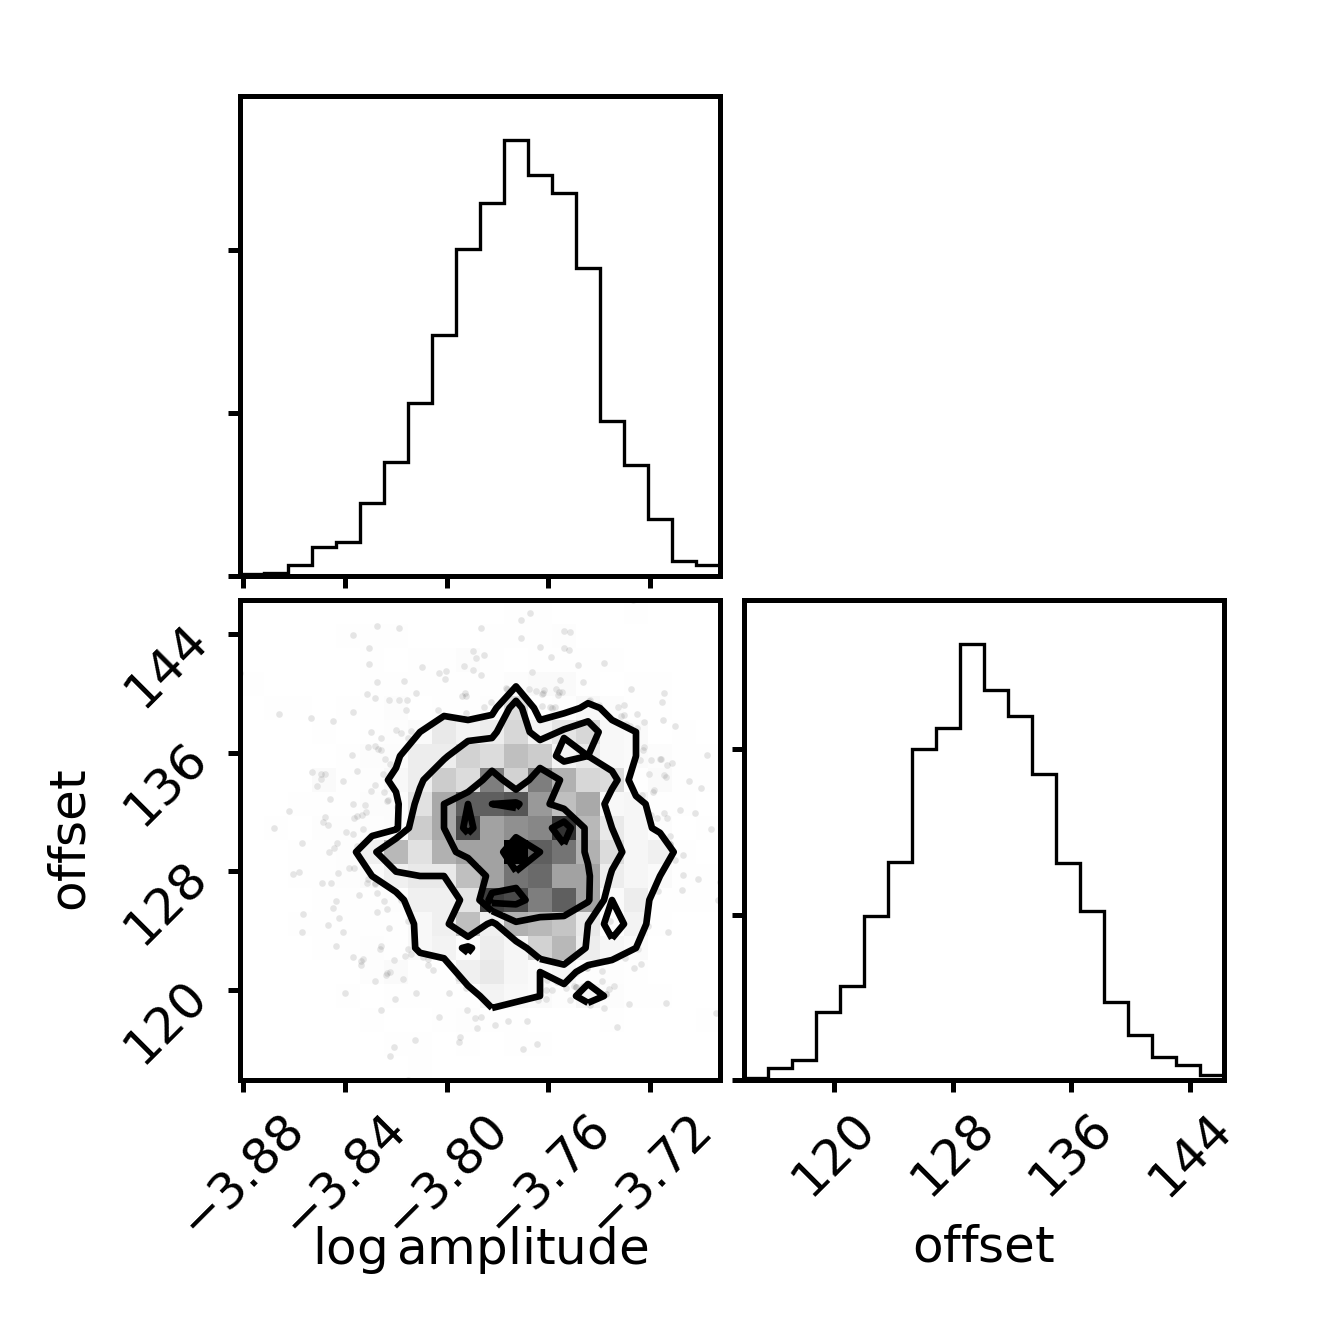

In [617]:
import corner

samples = pm.trace_to_dataframe(trace, varnames=["log_amp", "offset"])
corner.corner(
    np.array(samples),
#     truths=[log_amp_true, offset_true],
    labels=[r"$\log\,\mathrm{amplitude}$", r"$\mathrm{offset}$"],
);

# RM - Effect

In [692]:
starry.config.lazy = False
starry.config.quiet = True

Exception: Cannot change the `starry` config at this time. Config options should be set before instantiating any `starry` maps.

In [23]:
# map = starry.Map(udeg=2, rv=True)

# map.inc = 90
# map.obl = 0
# map.veq = 1.0e4
# map.alpha = 0.3 # differential rotation shear (unitless)

# map[1] = 0.5
# map[2] = 0.25

# map.show(rv=True)

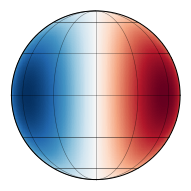

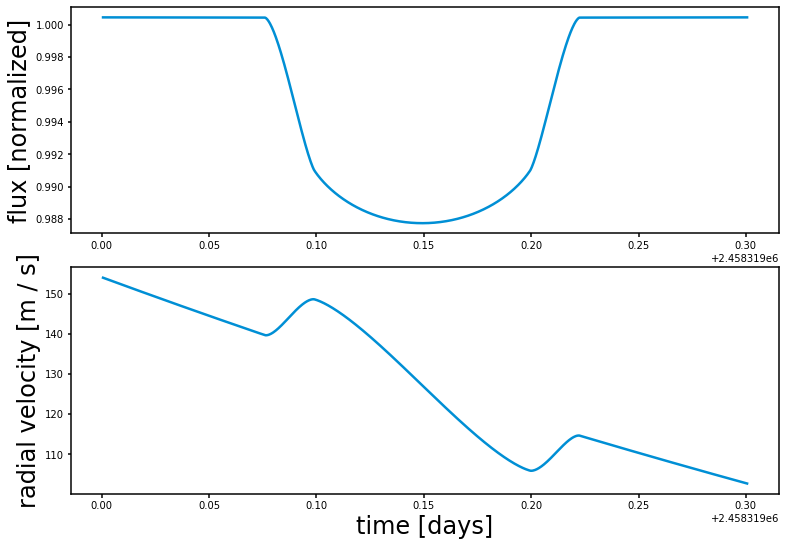

In [58]:
# use system from above
# Define the system
sys = starry.System(A, b)
A.map.show()

# Compute the flux & RV signal
# t = np.linspace(-0.5, 0.5, 1000)
t = np.linspace(pl['t0'] - .15, pl['t0'] + .15, 1000)
flux = sys.flux(t)
rv = sys.rv(t)

# Plot it
fig, ax = plt.subplots(2, figsize=(12, 8))
ax[0].plot(t, flux)
ax[1].plot(t, rv)
ax[1].set_xlabel("time [days]", fontsize=24)
ax[0].set_ylabel("flux [normalized]", fontsize=24)
ax[1].set_ylabel("radial velocity [m / s]", fontsize=24);

Pre-computing some matrices... Done.
Pre-computing some matrices... Done.


TypeError: object of type 'TensorVariable' has no len()

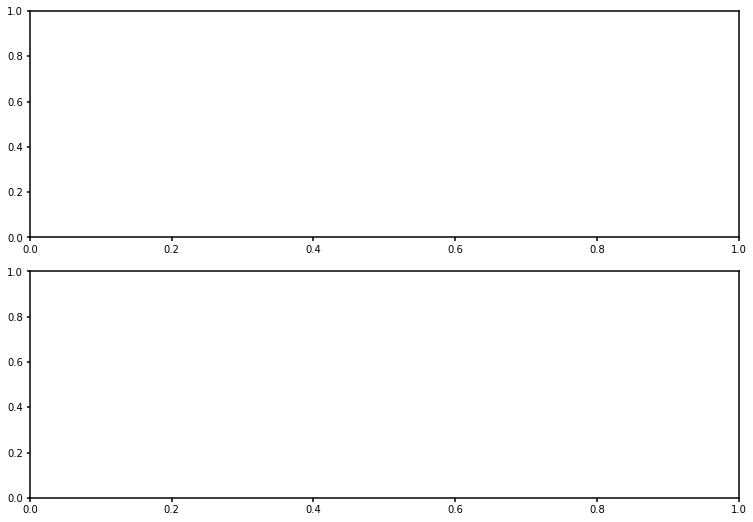

In [270]:
# # Define the star
# A = starry.Primary(
#     starry.Map(udeg=2, rv=True, amp=1, veq=5e4, alpha=0, obl=30),
#     r=1.0,
#     m=1.0,
#     length_unit=u.Rsun,
#     mass_unit=u.Msun,
# )
# A.map[1] = 0.5
# A.map[2] = 0.25

# # Define the planet
# b = starry.Secondary(
#     starry.Map(rv=True, amp=0, veq=0),
#     r=0.1,
#     porb=1.0,
#     m=0.01,
#     t0=0.0,
#     inc=80.0,
#     ecc=0.3,
#     w=60,
#     length_unit=u.Rsun,
#     mass_unit=u.Msun,
#     angle_unit=u.degree,
#     time_unit=u.day,
# )

# # Define the system
# sys = starry.System(A, b)

# # Compute the flux & RV signal
# time = np.linspace(-0.5, 0.5, 1000)
# flux = sys.flux(time)
# rv = sys.rv(time)

# # Plot it
# fig, ax = plt.subplots(2, figsize=(12, 8))
# ax[0].plot(time, flux)
# ax[1].plot(time, rv)
# ax[1].set_xlabel("time [days]", fontsize=24)
# ax[0].set_ylabel("flux [normalized]", fontsize=24)
# ax[1].set_ylabel("radial velocity [m / s]", fontsize=24);


# Dynamics

## tidal dissipation
estimate orbital decay using eqn 2 in Adams et al.

In [702]:
# Nsamp = 1000
# Tcirc = aux.get_Tcirc(0.1122, 1.026, np.random.normal(1.25, 0.06,size=Nsamp), 1.929, e=0.6, Qp=np.random.uniform(1e6, 1e8, size=Nsamp))
# plt.hist(Tcirc.value)

# using current best-fit posteriors and Q=10^6
aux.get_Tcirc(0.1122, 1, 1.25, 2, e=0.6, Qp=1e6)

<Quantity 2.94864615e+09 yr>

In [703]:
# TOI-150b for a cross-check:
a = 0.07
Mstar = 1.35
Rp = 1.255
Mp = 2.51
e =0.26
aux.get_Tcirc(a, Mstar, Rp, Mp, e, Qp=1e6)

<Quantity 2.79480224e+09 yr>

# Atmosphere
calculate Teq assuming instantaneous equilibration

In [738]:
theta = np.linspace(0., 2*np.pi, 200)

Teq_curve = aux.Teq(Lstar, aux.r_of_theta(theta, a=0.1122, e=0.62), albedo=0, emissivity=1,
                           beta=1)
print('min: {:.0f} K\nmax: {:.0f} K'.format(min(Teq_curve), max(Teq_curve)))

min: 683 K
max: 1410 K


## calculate transit duratino

7.256978025766166

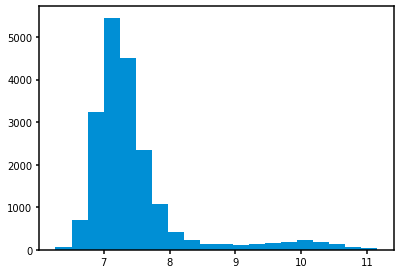

In [1198]:
transiting_planets = [1]

## obtain a/R given the stellar density (rho)
if 'rho' in results.posteriors['posterior_samples'].keys() or 'rho' in dataset.priors.keys():
    try:
        rho = results.posteriors['posterior_samples']['rho']
    except KeyError: # rho was a fixed parameter then
        rho = dataset.priors['rho']['hyperparameters']
        # if dataset.priors['rho']['distribution'] == 'fixed':
        #     rho = dataset.priors['rho']['hyperparameters']
        # elif dataset.priors['rho']['distribution'] == 'normal':
        #     rho = np.random.normal(loc=dataset.priors['rho']['hyperparameters'][0], scale=dataset.priors['rho']['hyperparameters'][1],size=num_samps)
        # else:
        #     rho = dataset.priors['rho']['hyperparameters'][0]
    for i_transit in transiting_planets:
        try:
            P = results.posteriors['posterior_samples']['P_p{}'.format(i_transit)]
        except KeyError:
            P = dataset.priors['P_p{}'.format(i_transit)]['hyperparameters']

        a = ((rho*G*((P*24.*3600.)**2))/(3.*np.pi))**(1./3.)
        results.posteriors['posterior_samples']['a_p{}'.format(i_transit)] = a

results.posteriors['posterior_samples']['transittime_p{}'.format(i_transit)] = get_transittime(period=P, aR=results.posteriors['posterior_samples']['a_p{}'.format(i_transit)],\
                                                                                                    p=results.posteriors['posterior_samples']['p_p{}'.format(i_transit)],\
                                                                                                    b=results.posteriors['posterior_samples']['b_p{}'.format(i_transit)])

plt.hist(results.posteriors['posterior_samples']['transittime_p1'])
np.median(results.posteriors['posterior_samples']['transittime_p1'])

# Demographics

use TEPCat catalog of well-characterized planets (https://www.astro.keele.ac.uk/jkt/tepcat/html-catalogue.html)

In [178]:
TEPCat =  pd.read_csv('/Users/schlecker/repos/notebooks/data/TEPcat_allplanets.csv')
TEPCat.columns = [c.strip() for c in TEPCat.columns]

# unfortunately, there are duplicate column names in the TEPCat catalog. What follows is an ugly hack to overcome that.
cols=pd.Series(TEPCat.columns)
for dup in cols[cols.duplicated()].unique(): 
    cols[cols[cols == dup].index.values.tolist()] = [dup + str(i) if i != 0 else dup for i in range(sum(cols == dup))]
# rename the columns with the cols list.
TEPCat.columns=cols
TEPCat.columns

Index(['System', 'Teff', 'err', 'err .1', '[Fe/H]', 'erru', 'errd', 'M_A',
       'errup', 'errdn', 'R_A', 'errup .1', 'errdn .1', 'loggA', 'errup .2',
       'errdn .2', 'rho_A', 'errup1', 'errdn1', 'Period', 'e', 'errup2',
       'errdown', 'a(AU)', 'errup3', 'errdown1', 'M_b', 'errup4', 'errdn2',
       'R_b', 'errup .11', 'errdn .11', 'g_b', 'errup .21', 'errdn .21',
       'rho_b', 'errup .3', 'errdn .3', 'Teq', 'err .2', 'err .3',
       'Discovery_reference', 'Recent_reference'],
      dtype='object')

In [180]:
TEPCat['errup2'].describe()

count    949.000000
mean      -0.331673
std        0.555968
min       -1.000000
25%       -1.000000
50%        0.009800
75%        0.090000
max        0.790000
Name: errup2, dtype: float64

In [514]:
def plot_periodEcc(TEPCat, P=None, e=None, P_err=None, e_err=None, M=None):
    """ column 'errup2' must be upper error of eccentricity.
    Jup, this is ugly."""
    c = TEPCat.copy()
    # exclude planets with upper limits on ecc and with negative ecc entries
    c = c[~((c.e ==0) & (c.errup2 > 0) | (c.e < 0))] 
    c = c[c.M_b > 0]
    print('showing {} planets.'.format(len(c)))
    fig, ax = plt.subplots(figsize=figsize)#figsize=set_size(width=513/2))
    
    # plot TEPCat catalog
    ax.scatter(c.Period, c.e, s=2*c.M_b)
    
    # plot planet candidate
    try:
#         ax.hlines(e, P_err[0], P_err[1])
#         ax.vlines(P, e_err[0], e_err[1])
        ax.scatter(P,e, s=2*M)#, label='TIC 237913194b')
        annotColor = 'black'
        _ = ax.annotate(r'TIC 237913194b', xy=(P,e), xytext=(P/2, 13/10*e), fontsize=8, va='center',
                       color=annotColor, ha='center', arrowprops=dict(arrowstyle='->',
                       connectionstyle='arc3,rad=-0.2', color=annotColor))
    except:
        pass
    
    # make a legend with different marker sizes
    # Create some sizes and some labels.
    sizes = [10**i for i in range(-1,3)]
    dummy = [-1 for i in range(len(sizes))]
    for i in range(len(sizes)):
        ax.scatter(dummy, dummy, s=2*sizes[i], label=sizes[i], c='C0')
    plt.legend(title='$\mathrm{M_p} \,\, [\mathrm{M_{Jup}}]$')
    
    ax.set_xscale('log')
    ax.set_ylim(0,1)
#     ax.set_ylim(0,.85)
    ax.set_xlim(1,100)
    ax.set_xlabel('period [d]')
    ax.set_ylabel('eccentricity')
    return fig, ax
    

In [515]:
# same for period-mass
def plot_periodMass(TEPCat, P=None, Mp=None, Mp_err=None, P_err=None):
    c = TEPCat.copy()
    # exclude planets with upper limits on ecc and with negative ecc entries
    c = c[~((c.e ==0) & (c.errup2 > 0) | (c.e < 0))]
    c = c[c.M_b > 0]
    print('showing {} planets.'.format(len(c)))
    
    fig, ax = plt.subplots()
    ax.scatter(c.Period, c.M_b)
    ax.errorbar(P, Mp, yerr=Mp_err, xerr=P_err)
    ax.set_xscale('log')
    

showing 460 planets.


<IPython.core.display.Javascript object>


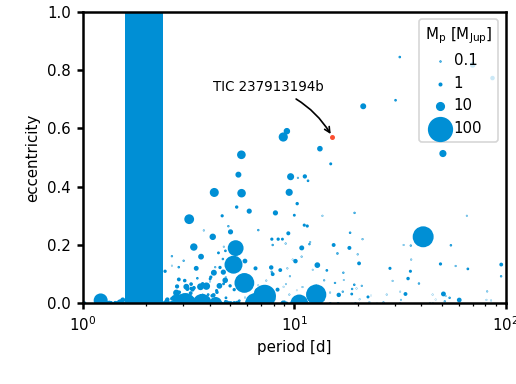

In [516]:
P, P_err_up, P_err_lo = juliet.utils.get_quantiles(results.posteriors['posterior_samples']['P_p1'])
e, e_err_up, e_err_lo = juliet.utils.get_quantiles(results.posteriors['posterior_samples']['ecc_p1'])
M, M_err_up, M_err_lo = juliet.utils.get_quantiles(results.posteriors['posterior_samples']['mass_mj_p1'])

fig, ax = plot_periodEcc(TEPCat, P=P, e=e, P_err=[P_err_up, P_err_lo], e_err=[e_err_up, e_err_lo], M=M)

In [467]:
# fig.savefig('/Users/schlecker/WINE/TIC237913194/out/39_tess+chat+feros+GP/' + 'periodEcc.pdf')

which ecc percentile is our planet in?

In [518]:
c = TEPCat.copy()
# same filtering as in the plot
c = c[~((c.e ==0) & (c.errup2 > 0) | (c.e < 0))] 
c = c[c.M_b > 0]
c.e.quantile(.98)

0.5627999999999997